# 2. KernelSVM (커널 서포트 벡터 머신)

In [1]:
# matplotlib과 관련된 모듈을 미리 선언
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import numpy as np

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


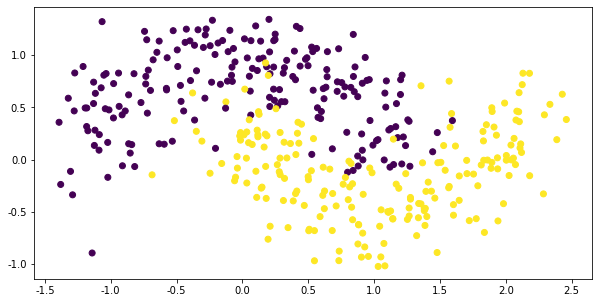

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 400, noise = 0.25, random_state = 42)
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

make_moons는 초승달 모양을 가진 2개의 클러스터를 가진 데이터를 생성해준다.  
  - noise : 잡음의 크기를 설정한다. 0으로 설정하면 정확한 반원이 생성된다.  
  - 직선을 사용하여 분리하는게 어렵다.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# 여기서는 매개변수로 커널을 변경할 수 있는 SVC를 사용하겠다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

linear_svc = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

print('train score : {:.3f}'.format(linear_svc.score(X_train, y_train)))
print('test score : {:.3f}'.format(linear_svc.score(X_test, y_test)))

train score : 0.850
test score : 0.800


In [4]:
def draw_contour(model, X, y):
    x_min, x_max, y_min, y_max = -2, 3, -1.5, 2
    X_grid, Y_grid = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                np.arange(y_min, y_max, 0.01))
    pred_grid = model.predict(np.array([X_grid.ravel(), Y_grid.ravel()]).T)
    Z = np.reshape(pred_grid, X_grid.shape)

    plt.figure(figsize = (10, 5))
    plt.contourf(X_grid, Y_grid, Z, alpha=0.3)
    plt.scatter(X[y == 1, 0],
                X[y == 1, 1], c = 'b')
    plt.scatter(X[y == 0, 0],
                X[y == 0, 1], c = 'r')
    plt.show()

-------- 부가 설명 ----------

In [5]:
x_min, x_max, y_min, y_max = -3, 3, -3, 3
X_grid, Y_grid = np.meshgrid(np.arange(x_min, x_max, 0.01),
                            np.arange(y_min, y_max, 0.01))
print('grid의 shape : {}\n\n'.format(X_grid.shape))
print('grid의 값 : \n\n{}'.format(X_grid))

grid의 shape : (600, 600)


grid의 값 : 

[[-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 ...
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]]


In [6]:
# flatten : ravel()
x = np.array([[[1,2,3]],[[4,5,6]]])
x

array([[[1, 2, 3]],

       [[4, 5, 6]]])

In [7]:
print('행렬 x를 ravel() 한 결과 : {}'.format(x.ravel())) # matrix를 vector화 한다.

행렬 x를 ravel() 한 결과 : [1 2 3 4 5 6]


In [8]:
print('X_grid를 ravel() 한 결과의 shape : {}\n\n'.format(X_grid.ravel().shape))
print('X_grid를 ravel() 한 결과 값 : {}'.format(X_grid.ravel()))

X_grid를 ravel() 한 결과의 shape : (360000,)


X_grid를 ravel() 한 결과 값 : [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]


In [9]:
x, y = [1,2,3], [10,20,30]
print(x, y)

[1, 2, 3] [10, 20, 30]


In [10]:
print(np.array([x, y]))

[[ 1  2  3]
 [10 20 30]]


In [11]:
print(np.array([x, y]).T)
# np.array().T는 전치행렬을 실행한다. 열과 행을 바꿔준다.

[[ 1 10]
 [ 2 20]
 [ 3 30]]


-----설명 끝 -----

3차원을 시각화하는 방법에는 등고선으로 표현하는 방법이 있다.  
  - contour : 등고선만 그려준다.  
  - contourf : 등고선에다 색까지 칠해준다.  
  입력변수들을 그대로 사용할 수는 없고 meshgrid 명령으로 그리드 포인트 행렬을 만들어 줘야 한다.  
  meshgrid를 많이 그려줄수록 시간은 오래 걸리게 된다.

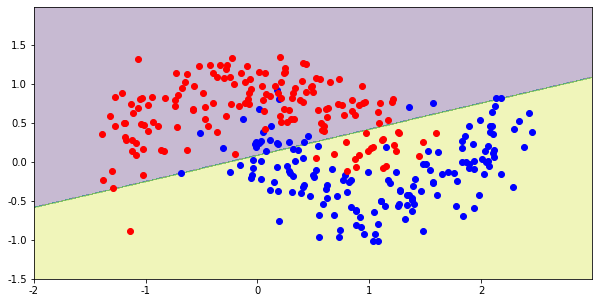

In [12]:
draw_contour(linear_svc, X_train, y_train)

선형모델로 분류를 해본 결과.

그 어떤 cost 함수를 사용해도 선형 SVM으로는 분류가 불가능할 때, 커널 SVM은 커널 트릭이라 불리는 데이터 처리 방법을 사용해서 데이터를 분류할 수 있다. 

### 매개변수 kernel을 변경해보면서 결과를 확인해보자.

#### 다차항 커널

In [14]:
poly_svc = SVC(kernel = 'poly', C = 1, degree = 10, 
               coef0 = 1, gamma = 1).fit(X_train, y_train)

print('train score : {:.3f}'.format(poly_svc.score(X_train, y_train)))
print('test score : {:.3f}'.format(poly_svc.score(X_test, y_test)))

train score : 0.966
test score : 0.875


poly는 다항식 커널을 말한다.  
poly로 설정할 때에는 degree차수를 지정할 수 있다, 기본값은 3이다.  
coef0은 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절할 수 있다. (다항식 커널의 상수항 r을 나타낸다.)

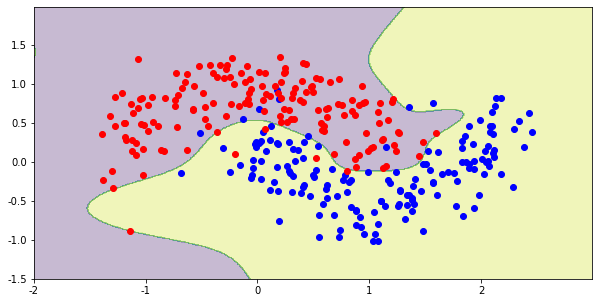

In [15]:
# degree = 3, coef0 = 1, C = 1
draw_contour(poly_svc, X_train, y_train)

In [16]:
poly_svc_d20 = SVC(kernel = 'poly', C = 1, degree = 20, 
               coef0 = 1, gamma = 1).fit(X_train, y_train)

print('train score : {:.3f}'.format(poly_svc_d20.score(X_train, y_train)))
print('test score : {:.3f}'.format(poly_svc_d20.score(X_test, y_test)))

train score : 0.981
test score : 0.850


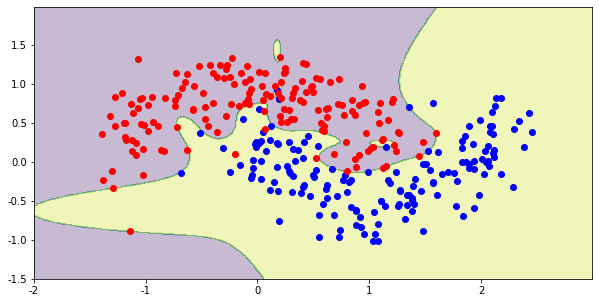

In [17]:
# degree = 20, coef0 = 1, C = 1
draw_contour(poly_svc_d20, X_train, y_train)

모델이 과적합상태라면 차수를 줄여보자.

In [18]:
poly_svc_r100 = SVC(kernel = 'poly', C = 1, degree = 20, 
               coef0 = 100, gamma = 1).fit(X_train, y_train)

print('train score : {:.3f}'.format(poly_svc_r100.score(X_train, y_train)))
print('test score : {:.3f}'.format(poly_svc_r100.score(X_test, y_test)))

train score : 0.494
test score : 0.525


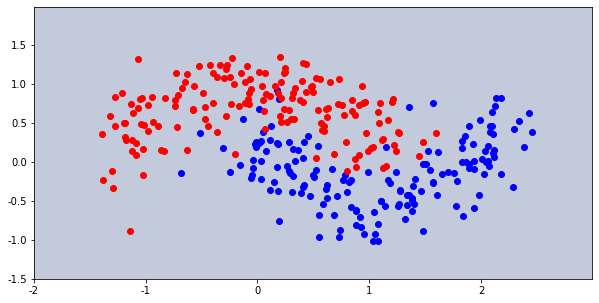

In [19]:
# degree = 20, coef0 = 100, C = 1
draw_contour(poly_svc_r100, X_train, y_train)

coef0을 100으로 주었더니 고차항의 영향을 많이 받게된다 적절한 coef0의 값을 찾는것도 중요하다.

#### 가우시안 RBF 커널

In [20]:
rbf_svc = SVC(kernel = 'rbf', C = 1, gamma = 1).fit(X_train, y_train)

print('train score : {:.3f}'.format(rbf_svc.score(X_train, y_train)))
print('test score : {:.3f}'.format(rbf_svc.score(X_test, y_test)))

train score : 0.934
test score : 0.925


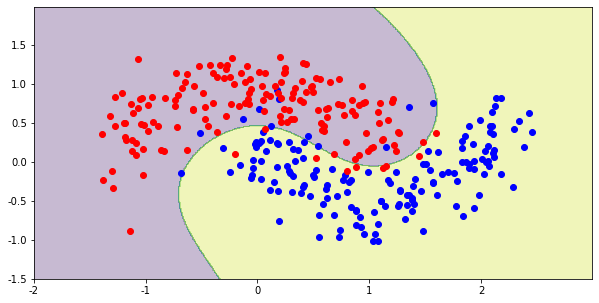

In [21]:
draw_contour(rbf_svc, X_train, y_train)

gamma 매개변수는 가우시안 커널 폭의 역수로 하나의 훈련 샘플이 미치는 영향의 범위를 결정한다. 작은 값은 넓은 영역, 큰 값은 영향이 미치는 영역이 좁아진다. C와 gamma를 함께 조정해주는 것이 좋다.

In [22]:
rbf_svc_g100 = SVC(kernel = 'rbf', C = 1, gamma = 100).fit(X_train, y_train)

print('train score : {:.3f}'.format(rbf_svc_g100.score(X_train, y_train)))
print('test score : {:.3f}'.format(rbf_svc_g100.score(X_test, y_test)))

train score : 0.984
test score : 0.887


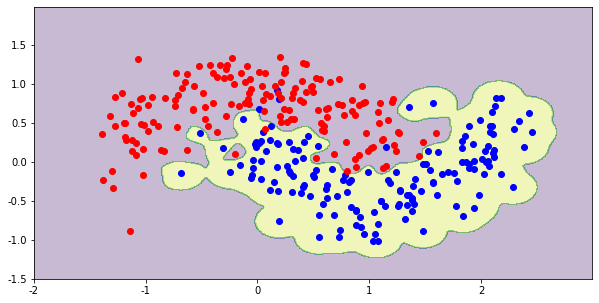

In [23]:
draw_contour(rbf_svc_g100, X_train, y_train)

In [24]:
rbf_svc_g001 = SVC(kernel = 'rbf', C = 1, gamma = 0.01).fit(X_train, y_train)

print('train score : {:.3f}'.format(rbf_svc_g001.score(X_train, y_train)))
print('test score : {:.3f}'.format(rbf_svc_g001.score(X_test, y_test)))

train score : 0.831
test score : 0.762


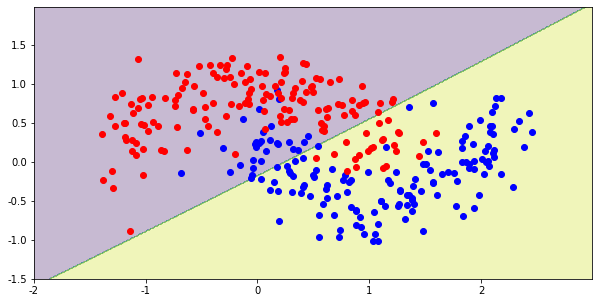

In [25]:
draw_contour(rbf_svc_g001, X_train, y_train)

In [26]:
rbf_svc_c001 = SVC(kernel = 'rbf', C = 0.1, gamma = 50).fit(X_train, y_train)

print('train score : {:.3f}'.format(rbf_svc_c001.score(X_train, y_train)))
print('test score : {:.3f}'.format(rbf_svc_c001.score(X_test, y_test)))

train score : 0.625
test score : 0.575


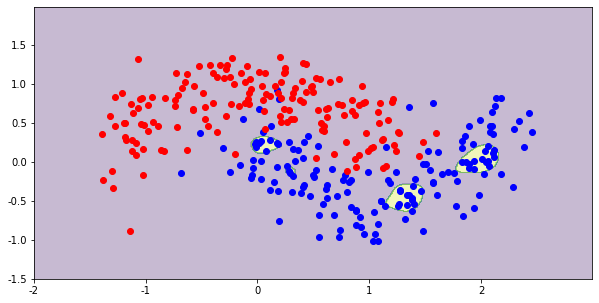

In [27]:
draw_contour(rbf_svc_c001, X_train, y_train)

커널 서포트 벡터 머신은 다양한 데이터셋에서 잘 작동한다. 특성이 적어도, 많아도 잘 작동하지만 데이터수가 많을 때와는 맞지 않다. 그리고 데이터의 전처리와 매개변수 설정에 신경을 많이 써야 한다. 특히 SVM모델은 분석하기도 어려워 예측이 어떻게 결정되었는지 이해하기 어려우며 모델을 설명하기가 힘들다.  
모든 특성이 비슷한 단위이며 스케일도 비슷하다면 SVM을 써볼만 하다.

사이킷런에서 제공하는 olivetti_faces를 이용하여 실습해보자.

olivetti_faces는 40명의 얼굴사진이 총 400장이 있다.  
이미지에는 다른 조건에서 찍은 사진들이다. (빛이나 얼굴표정 각도등이 다르다.)  

In [28]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

In [29]:
faces.images.shape
# 464 x 64의 픽셀을 가진 사진이 400장이 있다.

(400, 64, 64)

In [30]:
faces.data.shape
# data는 400장의 사진에대한 픽셀 배열들이 들어있다.

(400, 4096)

In [31]:
faces.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [32]:
faces.target.shape
# 0 ~ 39 까지 

(400,)

In [33]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                   test_size = 0.3, shuffle = True)

# svc = SVC(kernel = 'rbf', C = 1, gamma = 1).fit(X_train, y_train)
svc = SVC(kernel='linear').fit(X_train, y_train)

In [50]:
svc.score(X_test, y_test)

0.9166666666666666

In [51]:
svc.predict(X_test)

array([36, 15, 14,  6, 36,  1, 24, 39, 32, 19,  2, 31,  3,  0, 32, 15,  6,
       11,  4, 37, 28, 23, 22, 22, 34, 29, 18, 23,  5, 23, 35, 34,  9, 18,
       29,  7, 28,  5, 37, 16, 26, 20, 39, 29, 14,  1, 25, 22,  0, 21, 15,
       15, 12,  5, 39, 23, 36, 11, 38, 11, 39,  0, 34, 12,  0, 25, 12, 14,
       36, 36, 20, 11, 21, 23, 19, 21, 17, 18, 13, 15,  1, 35, 37, 28, 26,
       32, 14, 31, 29,  2, 32, 17,  5, 35, 24,  8, 33, 12, 30, 22, 19, 33,
        7, 32, 31, 24, 33,  2,  3,  8, 20, 29, 18,  4, 39, 14, 10, 17, 22,
        0])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0, flags=flags)


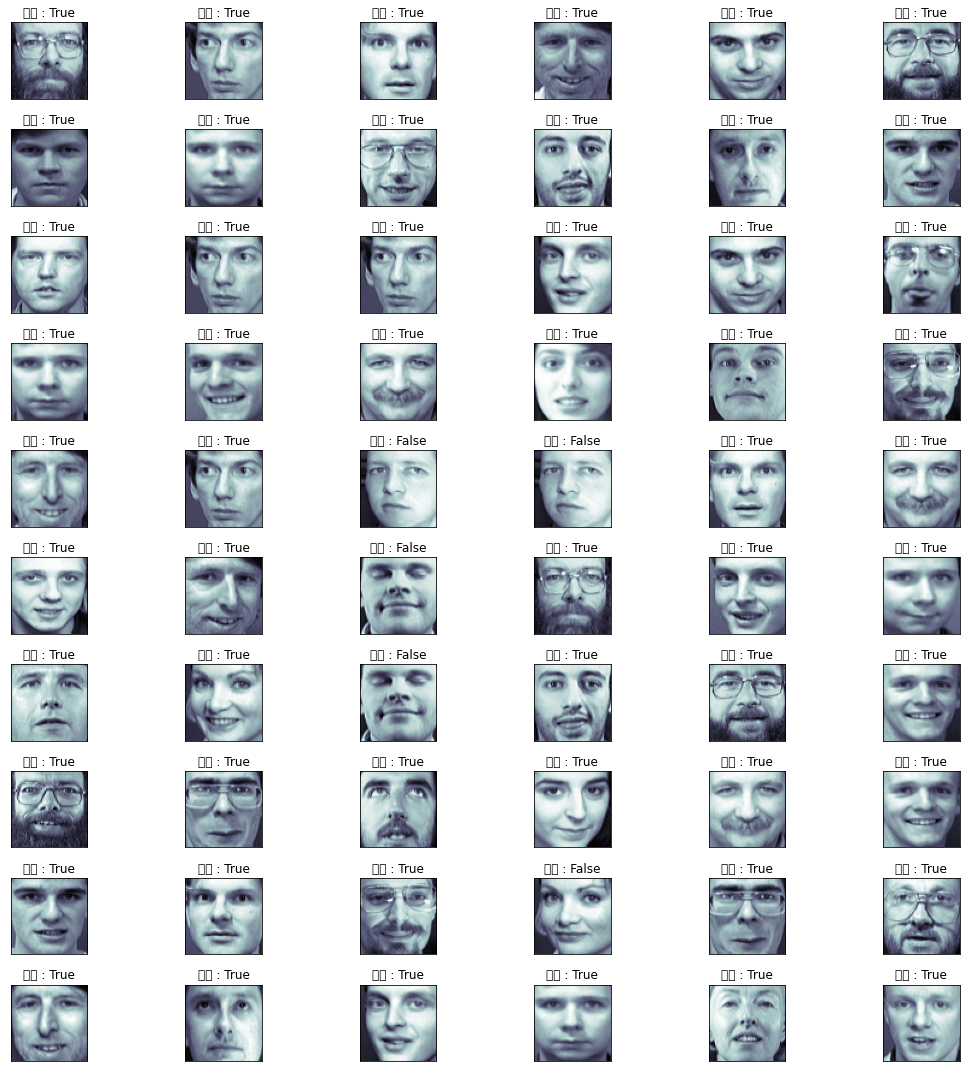

In [37]:
N = 10
M = 6
np.random.seed(4)
fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("결과 : {}".format(y_test[k] == svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()